거리별 상관관계 분석 <br>

분석지표 <br>
'RC_DIST', 'ORD', 'AGE', 'horse_weight', 'weight_gain', 'RC_TIME', 'WG_BUDAM', 'JK_AGE', 'JK_CAREER', 'TR_CAREER'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

In [ ]:
#df = pd.read_csv('source/rawdata_v1.2.csv')
df = pd.read_csv('source/raw_vol2.0.csv')

In [ ]:
df.head(1)

,MEET,RC_DATE,RC_NO,RC_DIST,RANK,WEATHER,TR_CON,TR_WC,ORD,CHUL_NO,...,BU_2F-G_TIME,BU_3F-G_TIME,BU_1F-G_TIME,BU_S1F_ACC_TIME,BU_G8F_ACC_TIME,BU_G6F_ACC_TIME,BU_G4F_ACC_TIME,BU_G3F_ACC_TIME,BU_G2F_ACC_TIME,BU_G1F_ACC_TIME
0,제주,20230701,1,800,제6등급,흐림,포화,18,1,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['MEET', 'RC_DATE', 'RC_NO', 'RC_DIST', 'RANK', 'WEATHER', 'TR_CON',
       'TR_WC', 'ORD', 'CHUL_NO', 'HR_NAME', 'HR_NO', 'NAME', 'PRD_NAME',
       'AGE', 'SEX', 'horse_weight', 'weight_gain', 'RC_TIME', 'ORD1_CNT_T',
       'ORD2_CNT_T', 'RC_CNT_T', 'ORD1_CNT_Y', 'ORD2_CNT_Y', 'RC_CNT_Y',
       'WG_BUDAM', 'JK_NAME', 'JK_NO', 'JK_AGE', 'JK_CAREER', 'JK_ORD1_CNT_T',
       'JK_ORD2_CNT_T', 'JK_RC_CNT_T', 'JK_ORD1_CNT_Y', 'JK_ORD2_CNT_Y',
       'JK_RC_CNT_Y', 'TR_NAME', 'TR_NO', 'TR_AGE', 'TR_CAREER',
       'TR_ORD1_CNT_T', 'TR_ORD2_CNT_T', 'TR_RC_CNT_T', 'TR_ORD1_CNT_Y',
       'TR_ORD2_CNT_Y', 'TR_RC_CNT_Y', 'HR_ORD1_CNT_T', 'HR_ORD2_CNT_T',
       'HR_RC_CNT_T', 'SJ_S1F_ORD', 'SJ_1C_ORD', 'SJ_2C_ORD', 'SJ_3C_ORD',
       'SJ_G3F_ORD', 'SJ_4C_ORD', 'SJ_G1F_ORD', 'SE_S1F_ACC_TIME',
       'SE_1C_ACC_TIME', 'SE_2C_ACC_TIME', 'SE_3C_ACC_TIME', 'SE_G3F_ACC_TIME',
       'SE_4C_ACC_TIME', 'SE_G1F_ACC_TIME', 'JE_S1F_TIME', 'JE_1C_TIME',
       'JE_2C_TIME', 'JE_3C_TIME', 'JE_G3F_

In [ ]:
df2 = df.loc[:, ['RC_DIST', 'ORD', 'AGE', 'horse_weight', 'weight_gain', 'RC_TIME', 'WG_BUDAM', 'JK_AGE', 'JK_CAREER', 'TR_CAREER']]

In [ ]:
df2.head(1)

,RC_DIST,ORD,AGE,horse_weight,weight_gain,RC_TIME,WG_BUDAM,JK_AGE,JK_CAREER,TR_CAREER
0,800,1,3,311.0,-18.0,65.2,55.0,30,9,27.0


In [ ]:
df_grouped = df.groupby(['RC_DIST', 'ORD']).count()
print(df_grouped['MEET'])

RC_DIST  ORD
800      1      691
         2      690
         3      689
         4      690
         5      691
               ... 
2200     9        4
         10       3
         11       2
         12       2
         13       1
Name: MEET, Length: 173, dtype: int64


In [ ]:
df800 = df2[df2['RC_DIST'] == 800]
df900 = df2[df2['RC_DIST'] == 900]
df1000 = df2[df2['RC_DIST'] == 1000]
df1110 = df2[df2['RC_DIST'] == 1110]
df1200 = df2[df2['RC_DIST'] == 1200]
df1300 = df2[df2['RC_DIST'] == 1300]
df1400 = df2[df2['RC_DIST'] == 1400]
df1600 = df2[df2['RC_DIST'] == 1600]
df1610 = df2[df2['RC_DIST'] == 1610]
df1700 = df2[df2['RC_DIST'] == 1700]
df1800 = df2[df2['RC_DIST'] == 1800]
df1900 = df2[df2['RC_DIST'] == 1900]
df2000 = df2[df2['RC_DIST'] == 2000]
df2200 = df2[df2['RC_DIST'] == 2200]


In [ ]:
df800.head(1)

,RC_DIST,ORD,AGE,horse_weight,weight_gain,RC_TIME,WG_BUDAM,JK_AGE,JK_CAREER,TR_CAREER
0,800,1,3,311.0,-18.0,65.2,55.0,30,9,27.0


In [ ]:
df800.dtypes

RC_DIST           int64
ORD               int64
AGE               int64
horse_weight    float64
weight_gain     float64
RC_TIME         float64
WG_BUDAM        float64
JK_AGE            int64
JK_CAREER         int64
TR_CAREER       float64
dtype: object

In [ ]:
df800.iloc[:10,1:].corr()

,ORD,AGE,horse_weight,weight_gain,RC_TIME,WG_BUDAM,JK_AGE,JK_CAREER,TR_CAREER
ORD,1.000000,-7.784989e-02,-0.657458,0.743786,0.854649,-0.415199,0.154562,0.054058,-5.037736e-01
AGE,-0.077850,1.000000e+00,0.069891,0.076230,-0.011202,0.166667,0.192134,0.333308,-2.680729e-17
horse_weight,-0.657458,6.989135e-02,1.000000,-0.646083,-0.644723,-0.128134,-0.078930,-0.078492,7.020359e-02
weight_gain,0.743786,7.622959e-02,-0.646083,1.000000,0.964610,-0.321858,0.478120,0.426006,-5.629870e-01
RC_TIME,0.854649,-1.120221e-02,-0.644723,0.964610,1.000000,-0.351002,0.330597,0.258129,-6.014546e-01
WG_BUDAM,-0.415199,1.666667e-01,-0.128134,-0.321858,-0.351002,1.000000,-0.192134,-0.009259,2.253613e-01
JK_AGE,0.154562,1.921341e-01,-0.078930,0.478120,0.330597,-0.192134,1.000000,0.967000,-3.921706e-01
JK_CAREER,0.054058,3.333076e-01,-0.078492,0.426006,0.258129,-0.009259,0.967000,1.000000,-3.924740e-01
TR_CAREER,-0.503774,-2.680729e-17,0.070204,-0.562987,-0.601455,0.225361,-0.392171,-0.392474,1.000000e+00


<Axes: >

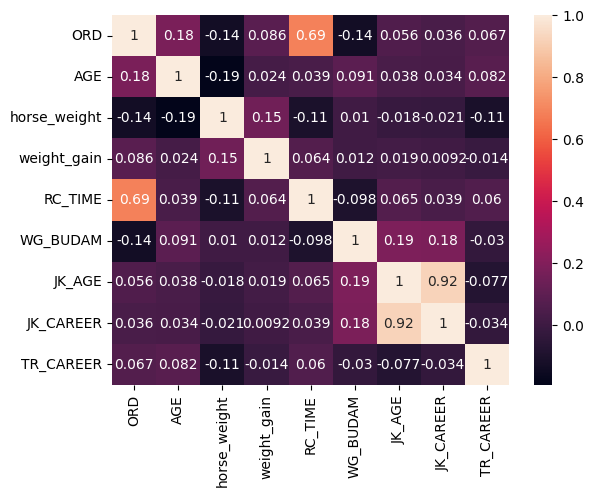

In [ ]:
sns.heatmap(df800.iloc[:,1:].corr(), annot = True)

In [ ]:
df2.corr()

,RC_DIST,ORD,AGE,horse_weight,weight_gain,RC_TIME,WG_BUDAM,JK_AGE,JK_CAREER,TR_CAREER
RC_DIST,1.000000,0.064834,0.143923,0.678082,0.012115,0.803293,-0.145460,-0.148919,-0.242121,-0.240070
ORD,0.064834,1.000000,0.104218,0.079215,0.035161,0.099628,-0.133677,-0.018870,-0.024121,0.009315
AGE,0.143923,0.104218,1.000000,-0.198659,-0.012088,0.396924,0.067378,0.022678,0.055908,0.088222
horse_weight,0.678082,0.079215,-0.198659,1.000000,0.052864,0.164994,-0.249145,-0.186769,-0.318380,-0.352201
weight_gain,0.012115,0.035161,-0.012088,0.052864,1.000000,0.002551,0.006169,-0.000649,-0.004632,0.001940
RC_TIME,0.803293,0.099628,0.396924,0.164994,0.002551,1.000000,0.004276,-0.054708,-0.081670,-0.059513
WG_BUDAM,-0.145460,-0.133677,0.067378,-0.249145,0.006169,0.004276,1.000000,0.231378,0.265697,0.058967
JK_AGE,-0.148919,-0.018870,0.022678,-0.186769,-0.000649,-0.054708,0.231378,1.000000,0.797266,0.008683
JK_CAREER,-0.242121,-0.024121,0.055908,-0.318380,-0.004632,-0.081670,0.265697,0.797266,1.000000,0.092982
TR_CAREER,-0.240070,0.009315,0.088222,-0.352201,0.001940,-0.059513,0.058967,0.008683,0.092982,1.000000


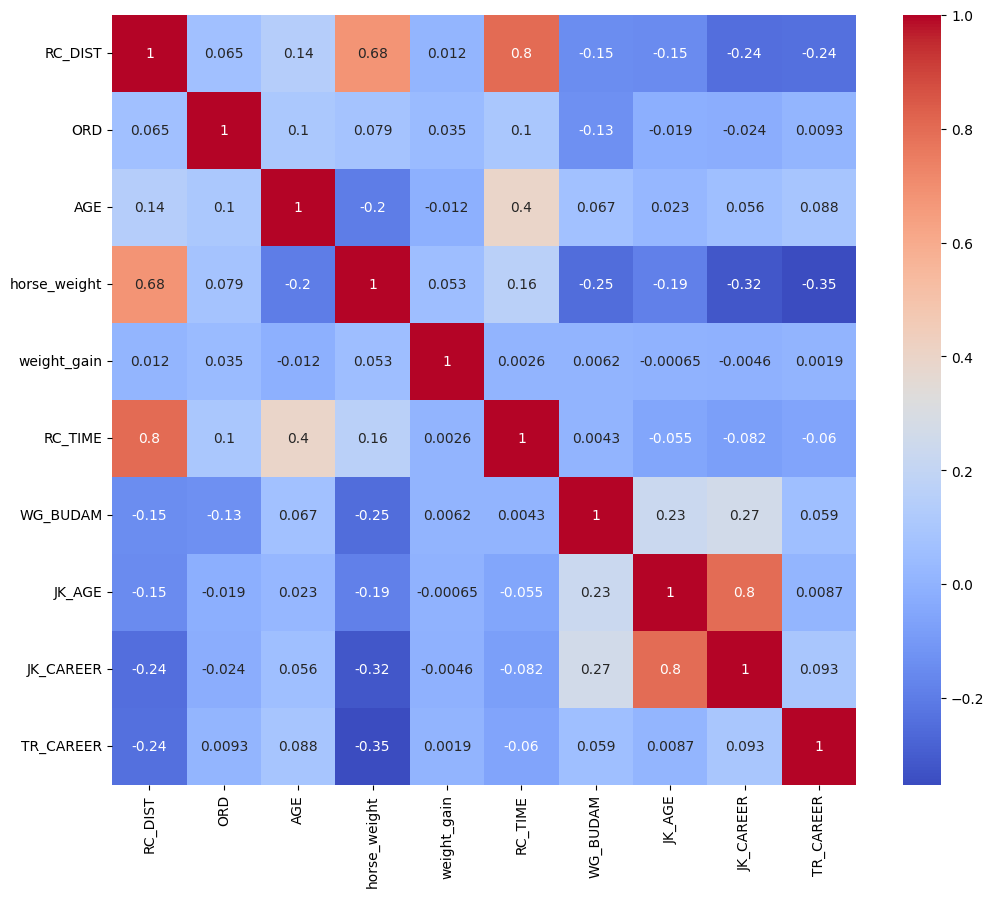

In [ ]:
# 전체데이터 상관관계

# 그림의 크기 설정 (예: 가로 12, 세로 10)
plt.figure(figsize=(12, 10))

# 상관관계 히트맵 그리기
sns.heatmap(df2.iloc[:, :].corr(), annot=True, cmap='coolwarm')

# 그래프 표시
plt.show()


In [ ]:
# 히트맵 그리기
"""
plt.figure(figsize=(12, 10))
sns.heatmap(df800.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 800')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df900.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 900')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1000.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1000')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1110.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1110')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1200.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1200')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1300.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1300')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1400.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1400')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1600.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1600')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1610.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1610')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1700.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1700')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1800.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1800')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df1900.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 1900')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df2000.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 2000')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df2200.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for RC_DIST = 2200')
plt.show()
"""

"\nplt.figure(figsize=(12, 10))\nsns.heatmap(df800.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap for RC_DIST = 800')\nplt.show()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(df900.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap for RC_DIST = 900')\nplt.show()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(df1000.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap for RC_DIST = 1000')\nplt.show()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(df1110.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap for RC_DIST = 1110')\nplt.show()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(df1200.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap for RC_DIST = 1200')\nplt.show()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(df1300.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap for RC_DIST = 1300')\nplt.show()\n\nplt.f

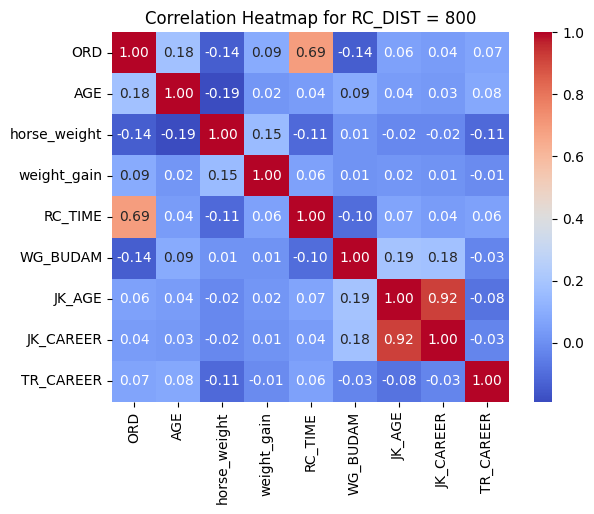

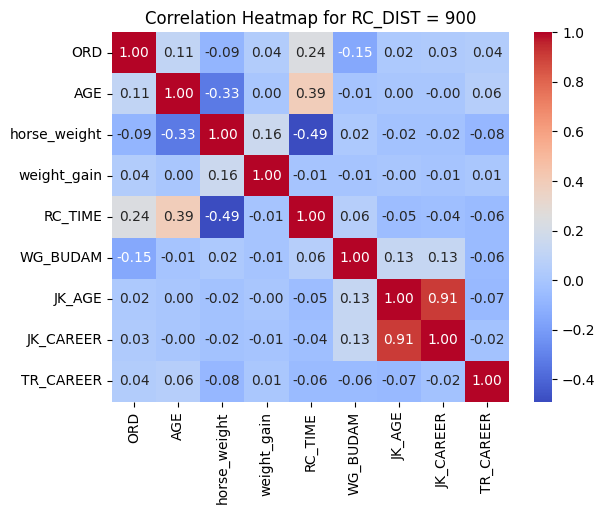

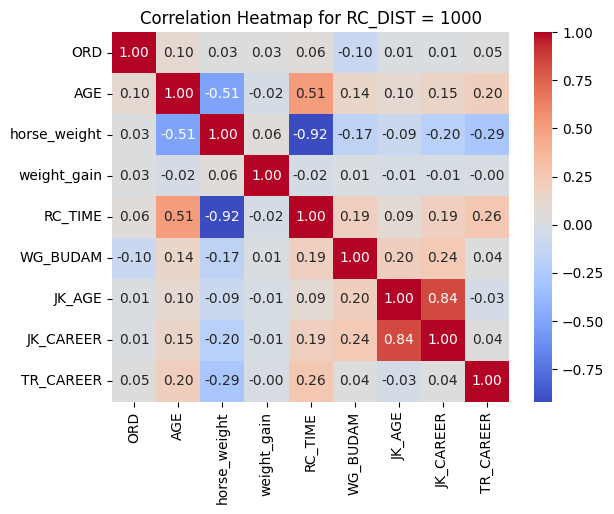

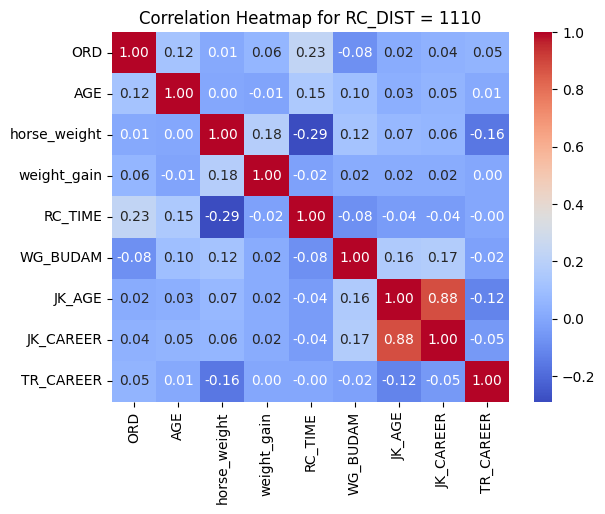

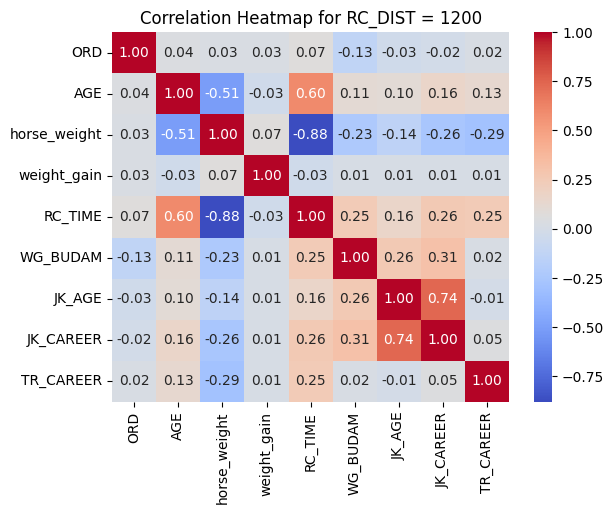

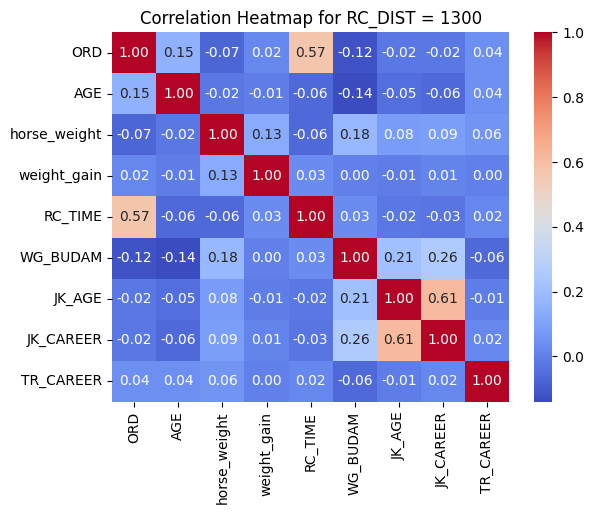

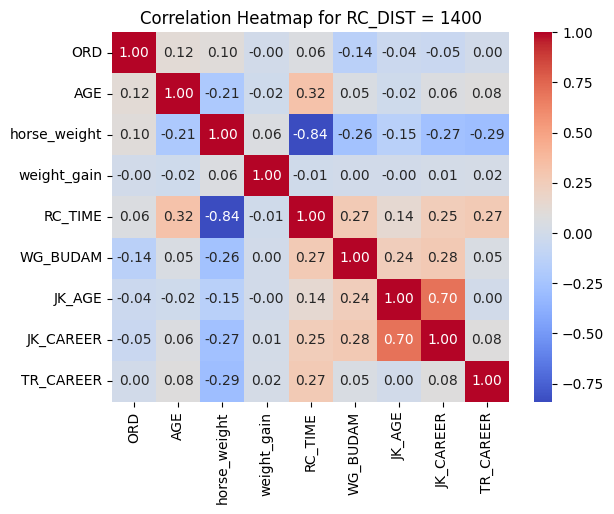

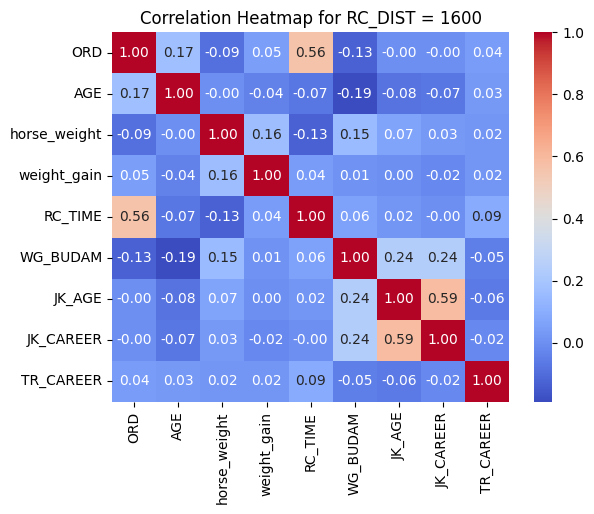

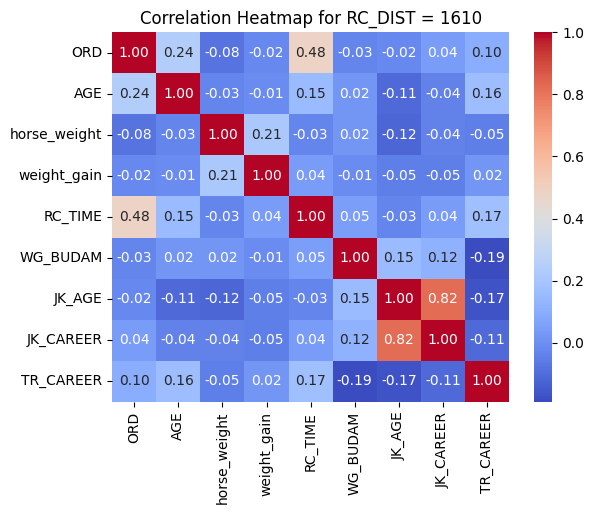

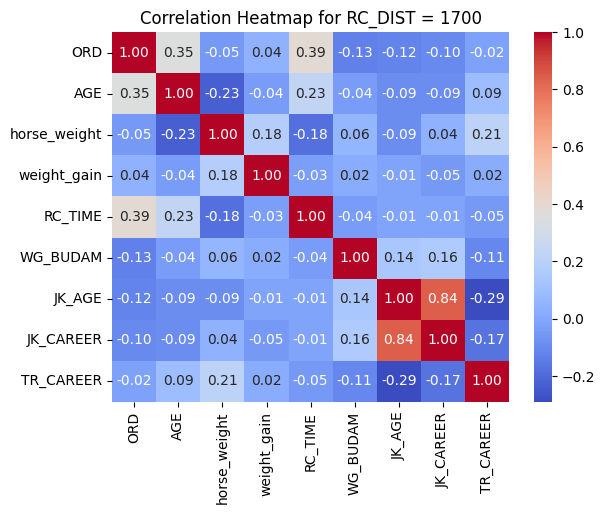

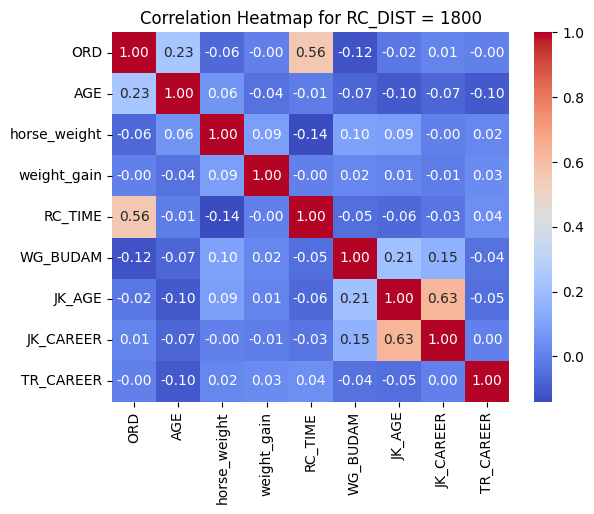

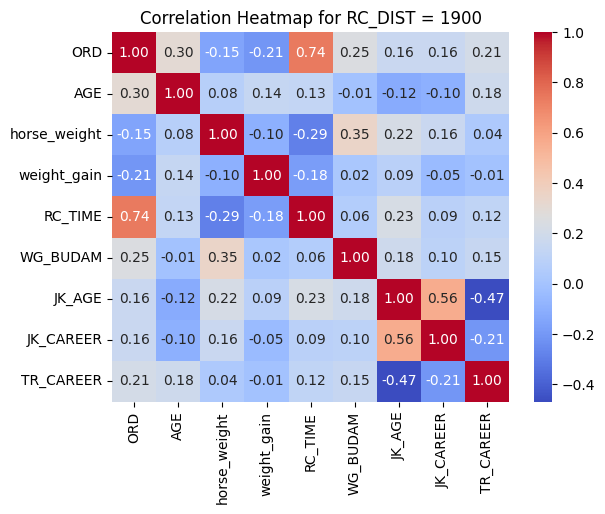

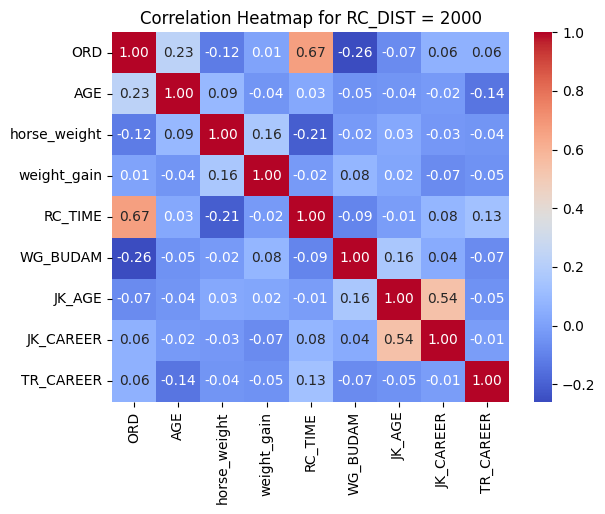

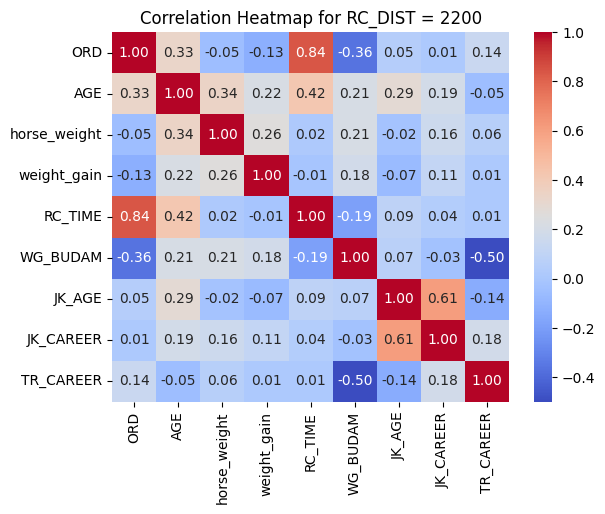

In [ ]:
# 히트맵 그리기

sns.heatmap(df800.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 800')
plt.show()

#plt.figure(figsize=(12, 10))
sns.heatmap(df900.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 900')
plt.show()


sns.heatmap(df1000.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1000')
plt.show()


sns.heatmap(df1110.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1110')
plt.show()


sns.heatmap(df1200.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1200')
plt.show()


sns.heatmap(df1300.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1300')
plt.show()


sns.heatmap(df1400.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1400')
plt.show()


sns.heatmap(df1600.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1600')
plt.show()


sns.heatmap(df1610.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1610')
plt.show()


sns.heatmap(df1700.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1700')
plt.show()


sns.heatmap(df1800.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1800')
plt.show()


sns.heatmap(df1900.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 1900')
plt.show()


sns.heatmap(df2000.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 2000')
plt.show()


sns.heatmap(df2200.iloc[:, 1:].corr().round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for RC_DIST = 2200')
plt.show()